# Importando bibliotecas

In [41]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Aquisição dos dados

In [42]:
# Casos confirmados - coronavírus (global)
url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

# Mortes - coronavírus (global)
url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

# Casos recuperados - coronavírus
url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [43]:
confirmed_global = pd.read_csv(url_1)
deaths_global = pd.read_csv(url_2)
recovered_global = pd.read_csv(url_3)

# Análise exploratória

In [44]:
confirmed_global.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,159649,159896,160252,160692,161004,161057,161290,162111,162926,163555
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,248070,248070,248859,251015,252577,254126,254126,255741,258543,258543
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,236670,238885,241406,243568,245698,247568,249310,250774,252117,253520
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,33025,33025,34701,35028,35028,35556,35556,35556,35958,35958
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,96582,97263,97594,97812,97901,98029,98057,98076,98116,98226
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,5931,6023,6023,6442,6524,6558,6558,6558,6627,6627
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,7862536,7940657,8041520,8130023,8207752,8271636,8313614,8335184,8378656,8427778
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,351711,352399,353731,355662,358218,361754,364348,366433,367795,370922
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,31366,31941,33071,33933,34418,34976,35520,36031,36474,37023
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,975564,994277,1015495,1033364,1083622,1103219,1121481,1139787,1086483,1098290


In [45]:
print(f'Número de Linhas: {confirmed_global.shape[0]}')
print(f'Número de Colunas: {confirmed_global.shape[1]}')

Número de Linhas: 280
Número de Colunas: 746


Logo de início já é possível perceber que alguns valores de `Province/State` estão preenchidos com `NaN`. Isso pode ter sido causado por falta de informação na hora de preencher ou pela não necessidade de preencher.

In [46]:
print(f"Número de dados NaN em Province/State: {confirmed_global['Province/State'].isna().sum()}")

Número de dados NaN em Province/State: 193


Países presentes na base de dados:

In [47]:
confirmed_global['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

Número de vezes que cada país aparece:

In [48]:
confirmed_global['Country/Region'].value_counts()

China             34
Canada            16
United Kingdom    12
France            12
Australia          8
                  ..
Philippines        1
Kosovo             1
Dominica           1
Iran               1
Paraguay           1
Name: Country/Region, Length: 196, dtype: int64

Esses números não refletem a quantidade real já que, como visto antes, há valores `NaN` para Províncias ou Estados, o que indica que pode haver Províncias ou Estados que não reportaram casos o que influencia diretamente na quantidade de aparições dos países.

Uma possível saída para esse problema seria agrupar os valores por país e somar as colunas.

In [49]:
confirmed_global_by_country = confirmed_global.groupby('Country/Region').sum()

confirmed_global_by_country.head(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,159649,159896,160252,160692,161004,161057,161290,162111,162926,163555
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,248070,248070,248859,251015,252577,254126,254126,255741,258543,258543
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,236670,238885,241406,243568,245698,247568,249310,250774,252117,253520
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,33025,33025,34701,35028,35028,35556,35556,35556,35958,35958
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,96582,97263,97594,97812,97901,98029,98057,98076,98116,98226
Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,0,0,...,5931,6023,6023,6442,6524,6558,6558,6558,6627,6627
Argentina,-38.41610,-63.616700,0,0,0,0,0,0,0,0,...,7862536,7940657,8041520,8130023,8207752,8271636,8313614,8335184,8378656,8427778
Armenia,40.06910,45.038200,0,0,0,0,0,0,0,0,...,351711,352399,353731,355662,358218,361754,364348,366433,367795,370922
Australia,-256.85020,1130.843900,0,0,0,0,4,5,5,6,...,2229104,2287126,2340046,2391062,2457285,2523265,2570523,2607242,2580386,2620532


É importante ressaltar que as colunas de `Lat` (latitude) e `Long` (longitude) também são de valores numéricos e, ao somar, somamos as latitudes e longitudes. Logo, os valores atuais já não representam mais uma informação valida de latitude e longitude. Sendo assim, podemos retirar esses dados.

In [50]:
confirmed_global_by_country = confirmed_global_by_country.drop(['Lat', 'Long'], axis=1)

confirmed_global_by_country.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,159649,159896,160252,160692,161004,161057,161290,162111,162926,163555
Albania,0,0,0,0,0,0,0,0,0,0,...,248070,248070,248859,251015,252577,254126,254126,255741,258543,258543
Algeria,0,0,0,0,0,0,0,0,0,0,...,236670,238885,241406,243568,245698,247568,249310,250774,252117,253520
Andorra,0,0,0,0,0,0,0,0,0,0,...,33025,33025,34701,35028,35028,35556,35556,35556,35958,35958
Angola,0,0,0,0,0,0,0,0,0,0,...,96582,97263,97594,97812,97901,98029,98057,98076,98116,98226
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,5931,6023,6023,6442,6524,6558,6558,6558,6627,6627
Argentina,0,0,0,0,0,0,0,0,0,0,...,7862536,7940657,8041520,8130023,8207752,8271636,8313614,8335184,8378656,8427778
Armenia,0,0,0,0,0,0,0,0,0,0,...,351711,352399,353731,355662,358218,361754,364348,366433,367795,370922
Australia,0,0,0,0,4,5,5,6,9,9,...,2229104,2287126,2340046,2391062,2457285,2523265,2570523,2607242,2580386,2620532


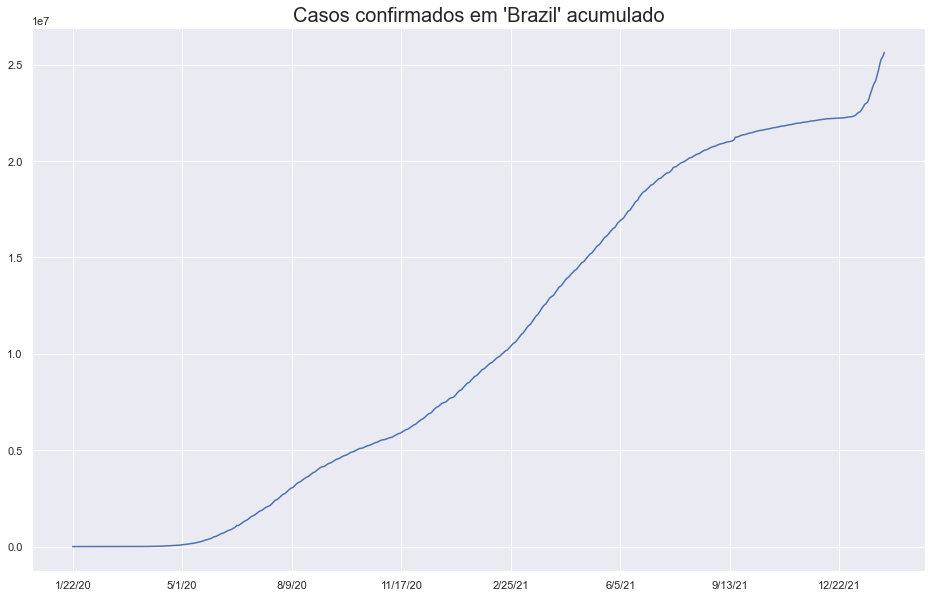

In [51]:
plt.figure(figsize=(16, 10))

confirmed_global_by_country.loc['Brazil'].plot()
plt.title("Casos confirmados em 'Brazil' acumulado", fontsize=20)

plt.show()

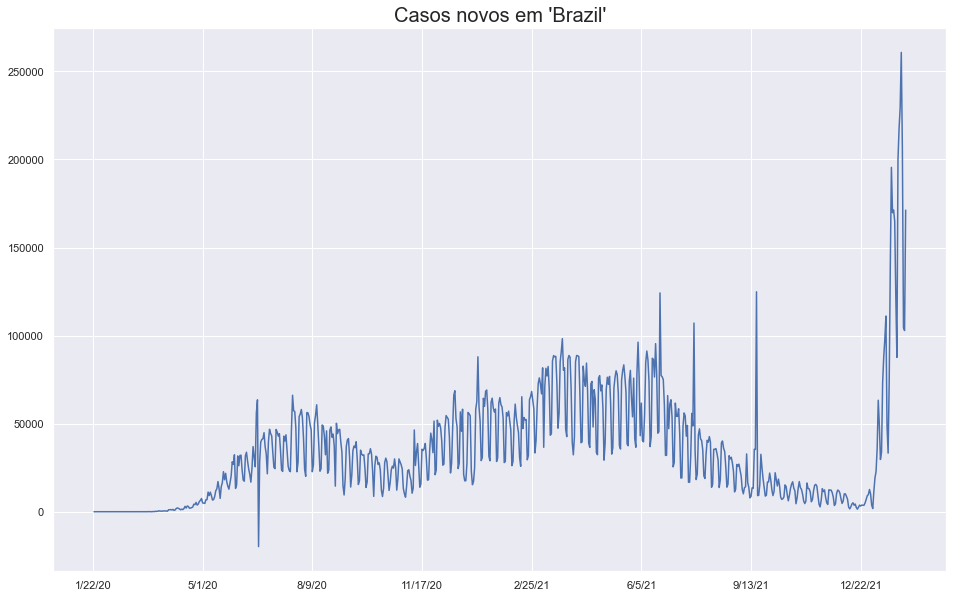

In [52]:
plt.figure(figsize=(16, 10))

confirmed_global_by_country.loc['Brazil'].diff().plot()
plt.title("Casos novos em 'Brazil'", fontsize=20)

plt.show()

Comparar os casos de 10 paises com mais caso no dia mais recente relatado.

In [53]:
last_date = confirmed_global_by_country.iloc[:, -1].name

In [54]:
last_date_country = confirmed_global_by_country[last_date].sort_values(ascending=False)[:10]

last_date_country

Country/Region
US                75350359
India             41630885
Brazil            25634781
France            19681231
United Kingdom    17544380
Russia            11795059
Turkey            11722483
Italy             11116422
Germany           10236740
Spain             10039126
Name: 2/1/22, dtype: int64

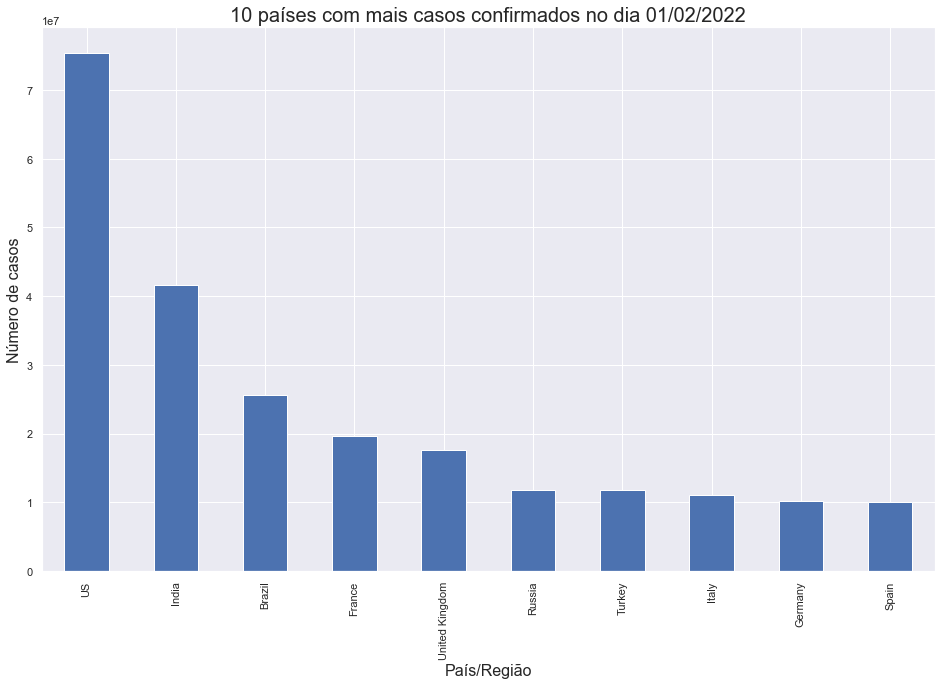

In [55]:
plt.figure(figsize=(16, 10))

last_date_country.plot(kind='bar')
plt.title(f'10 países com mais casos confirmados no dia {pd.to_datetime(last_date).strftime("%d/%m/%Y")}', fontsize=20)

plt.xlabel('País/Região', fontsize=16)
plt.ylabel('Número de casos', fontsize=16)
plt.show()

## Juntando dados

In [56]:
def latest_by_country(data):
    return data.groupby('Country/Region').sum().iloc[:, -1]

In [57]:
latest_by_country(confirmed_global)

Country/Region
Afghanistan            163555
Albania                258543
Algeria                253520
Andorra                 35958
Angola                  98226
                       ...   
Vietnam               2286750
West Bank and Gaza     535160
Yemen                   11061
Zambia                 305557
Zimbabwe               229851
Name: 2/1/22, Length: 196, dtype: int64

In [58]:
latest_by_country(deaths_global)

Country/Region
Afghanistan            7417
Albania                3346
Algeria                6593
Andorra                 145
Angola                 1895
                      ...  
Vietnam               37777
West Bank and Gaza     5104
Yemen                  2013
Zambia                 3920
Zimbabwe               5350
Name: 2/1/22, Length: 196, dtype: int64

In [59]:
latest_by_country(recovered_global)

Country/Region
Afghanistan           0
Albania               0
Algeria               0
Andorra               0
Angola                0
                     ..
Vietnam               0
West Bank and Gaza    0
Yemen                 0
Zambia                0
Zimbabwe              0
Name: 2/1/22, Length: 196, dtype: int64

In [60]:
combined = pd.concat([
    latest_by_country(confirmed_global),
    latest_by_country(deaths_global),
    latest_by_country(recovered_global)
], axis=1)

combined.head(10)

,2/1/22,2/1/22,2/1/22
Country/Region,,,
Afghanistan,163555,7417,0
Albania,258543,3346,0
Algeria,253520,6593,0
Andorra,35958,145,0
Angola,98226,1895,0
Antigua and Barbuda,6627,127,0
Argentina,8427778,121513,0
Armenia,370922,8056,0
Australia,2620532,3905,0


In [61]:
combined.columns = ['confirmed', 'deaths', 'recovered']

combined.head(10)

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,163555,7417,0
Albania,258543,3346,0
Algeria,253520,6593,0
Andorra,35958,145,0
Angola,98226,1895,0
Antigua and Barbuda,6627,127,0
Argentina,8427778,121513,0
Armenia,370922,8056,0
Australia,2620532,3905,0


Por algum motivo os dados de recuperados deixaram de ser atualizados depois de um tempo e vem com valor 0.

In [62]:
combined['recovered'].value_counts()

0    196
Name: recovered, dtype: int64

In [63]:
combined.sum()

confirmed    381683860
deaths         5688629
recovered            0
dtype: int64

Por esse motivo, irei utilizar a data mais recente que ainda havia informação

In [64]:
latest_by_country(confirmed_global.loc[:, :'8/4/21'])

Country/Region
Afghanistan           148933
Albania               133310
Algeria               176724
Andorra                14797
Angola                 43158
                       ...  
Vietnam               181756
West Bank and Gaza    317404
Yemen                   7096
Zambia                197791
Zimbabwe              113526
Name: 8/4/21, Length: 196, dtype: int64

In [65]:
latest_by_country(deaths_global.loc[:, :'8/4/21'])

Country/Region
Afghanistan           6836
Albania               2457
Algeria               4404
Andorra                128
Angola                1026
                      ... 
Vietnam               2327
West Bank and Gaza    3609
Yemen                 1380
Zambia                3430
Zimbabwe              3711
Name: 8/4/21, Length: 196, dtype: int64

In [66]:
latest_by_country(recovered_global.loc[:, :'8/4/21'])

Country/Region
Afghanistan            82586
Albania               130314
Algeria               118409
Andorra                14380
Angola                 39582
                       ...  
Vietnam                54332
West Bank and Gaza    312320
Yemen                   4251
Zambia                189658
Zimbabwe               82994
Name: 8/4/21, Length: 196, dtype: int64

In [67]:
combined_8_4_21 = pd.concat([
    latest_by_country(confirmed_global.loc[:, :'8/4/21']),
    latest_by_country(deaths_global.loc[:, :'8/4/21']),
    latest_by_country(recovered_global.loc[:, :'8/4/21'])
], axis=1)

combined_8_4_21.head(10)

,8/4/21,8/4/21,8/4/21
Country/Region,,,
Afghanistan,148933,6836,82586
Albania,133310,2457,130314
Algeria,176724,4404,118409
Andorra,14797,128,14380
Angola,43158,1026,39582
Antigua and Barbuda,1311,43,1239
Argentina,4975616,106747,4615834
Armenia,230993,4625,220438
Australia,35391,932,24203


In [68]:
combined_8_4_21.columns = ['confirmed', 'deaths', 'recovered']

combined_8_4_21.head(10)

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,148933,6836,82586
Albania,133310,2457,130314
Algeria,176724,4404,118409
Andorra,14797,128,14380
Angola,43158,1026,39582
Antigua and Barbuda,1311,43,1239
Argentina,4975616,106747,4615834
Armenia,230993,4625,220438
Australia,35391,932,24203


### Letalidade em 8/4/2021

#### - Global

In [69]:
sum_up = combined_8_4_21.sum()
letality_rate_1 = sum_up['deaths'] / sum_up['confirmed']

letality_rate_1 * 100

2.120606639550312

In [70]:
letality_rate_2 = sum_up['deaths'] / (sum_up['deaths'] + sum_up['recovered'])

letality_rate_2 * 100

3.1497123300157046

#### - Por país

In [71]:
combined_8_4_21['letality_rate_1'] = combined_8_4_21['deaths'] / combined_8_4_21['confirmed'] * 100
combined_8_4_21['letality_rate_2'] = combined_8_4_21['deaths'] / (combined_8_4_21['recovered'] + combined_8_4_21['deaths']) * 100

combined_8_4_21.head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,148933,6836,82586,4.589983,7.644651
Albania,133310,2457,130314,1.843073,1.850555
Algeria,176724,4404,118409,2.492021,3.585940
Andorra,14797,128,14380,0.865040,0.882272
Angola,43158,1026,39582,2.377311,2.526596
Antigua and Barbuda,1311,43,1239,3.279939,3.354134
Argentina,4975616,106747,4615834,2.145403,2.260353
Armenia,230993,4625,220438,2.002225,2.054980
Australia,35391,932,24203,2.633438,3.707977


In [72]:
combined_8_4_21.sort_values('letality_rate_1', ascending=False).head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Vanuatu,4,1,3,25.000000,25.000000
MS Zaandam,9,2,7,22.222222,22.222222
Yemen,7096,1380,4251,19.447576,24.507192
Peru,2119068,196673,2086086,9.281108,8.615583
Mexico,2901094,242547,2270427,8.360536,9.651791
Sudan,37138,2776,30647,7.474824,8.305658
Syria,26044,1919,22019,7.368300,8.016543
Ecuador,489089,31694,443880,6.480211,6.664368
Egypt,284472,16550,232179,5.817796,6.653828


In [73]:
combined_8_4_21.sort_values('letality_rate_2', ascending=False).head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Sweden,1102829,14657,0,1.329037,100.000000
US,35452414,614646,0,1.733721,100.000000
Belgium,1132934,25258,0,2.229433,100.000000
Serbia,723518,7129,0,0.985324,100.000000
United Kingdom,5980887,130300,24693,2.178607,84.068313
Netherlands,1905249,18131,28771,0.951634,38.657200
Spain,4545184,81844,150376,1.800675,35.244165
Vanuatu,4,1,3,25.000000,25.000000
Yemen,7096,1380,4251,19.447576,24.507192


#### Distribuição da letalidade

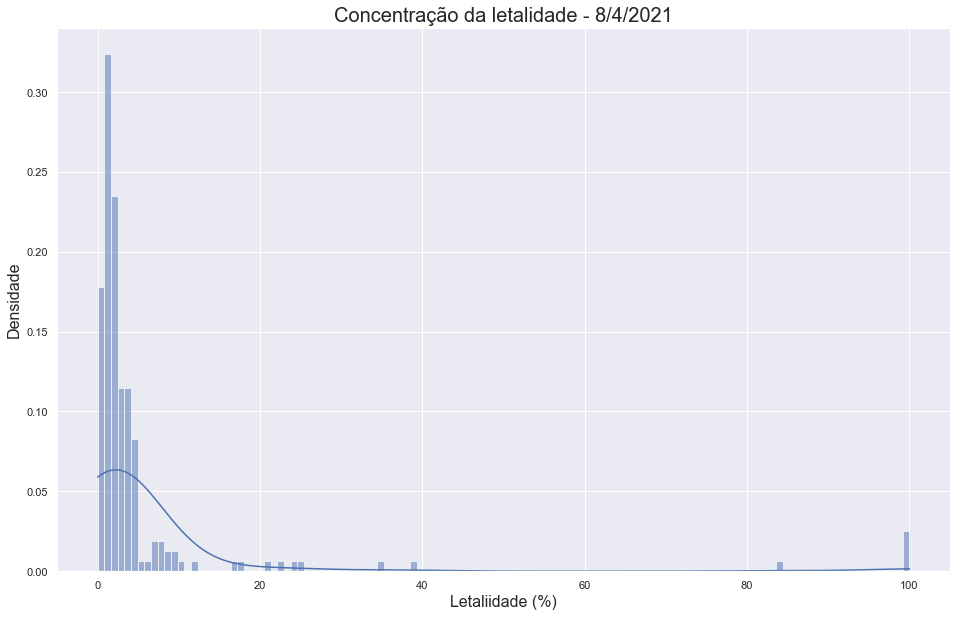

In [77]:
plt.figure(figsize=(16, 10))
sns.histplot(combined_8_4_21['letality_rate_2'], kde=True, stat='density')
plt.xlabel('Letaliidade (%)', fontsize=16)
plt.ylabel('Densidade', fontsize=16)
plt.title('Concentração da letalidade - 8/4/2021', fontsize=20)
plt.show()

Fica evidente, pelo gráfico, que a letalidade até o dia 8/4/2021 se concentra mais da faixa de 0% a 5%. Um possível motivo para países apresentarem uma letalidade alta pode ser, pelo cálculo utilizado(que gera `letality_rate_2`), que até a data de 8/4/2021 não tenham tantos casos recuperados.